<a href="https://colab.research.google.com/github/kgudalewski/grailed_sales_analysis/blob/main/Grailed_data_initial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [438]:
df = pd.read_csv("https://raw.githubusercontent.com/kgudalewski/grailed_sales_analysis/main/grailed_analysis_df.csv",encoding="utf-16").drop(columns="Unnamed: 0")
df.head()

,title,link,size,condition,color,seller_name,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,BMW racing rare archive bomber 90s,https://www.grailed.com/listings/33705557-bmw-...,Men's / US XS / EU 42 / 0,Used,Black,Humanraceeei,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.00,28.0,NaN
1,Mens Bomber Jacket Racing BMW F1 Size XL,https://www.grailed.com/listings/32948063-bmw-...,Men's / US XL / EU 56 / 4,Used,Blue,Casual_VntShop,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.43,45.0,NaN
2,BMW E36 Jacket,https://www.grailed.com/listings/42982572-bmw-...,Men's / US M / EU 48-50 / 2,Gently Used,Blue,beaubier32,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,NaN,35.0,NaN
3,Vintage BMW Racing Jacket Williams F1 Team Hoo...,https://www.grailed.com/listings/42929894-bmw-...,Men's / US XL / EU 56 / 4,Gently Used,Blue white,DealHand,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,NaN,50.0,NaN
4,y2k BMW Zip up Jacket,https://www.grailed.com/listings/42583439-bmw-...,Men's / US XL / EU 56 / 4,Gently Used,Black,hightailvinta5695,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.43,45.0,NaN


In [439]:
pd.DataFrame(df.groupby(by='seller_name').sold_price.mean().sort_values(ascending = False)[:120]).rename(columns={"sold_price":"sold_price_mean"})

,sold_price_mean
seller_name,
kaithompsen,2580.000000
TheJacketKing,1100.000000
Sincewhenwasthat,840.000000
eddie808,828.000000
eggcafe_,808.000000
...,...
onseam,275.000000
Vadic,275.000000
KCsupremesales,275.000000


In [440]:
print("I'm in",round((120 / 2744)*100, 2),"% most expensive selling sellers")

I'm in 4.37 % most expensive selling sellers


In [441]:
# list_of_sellers_with_higher_mean = df.groupby(by='seller_name').sold_price.mean().sort_values(ascending = False)[:120].index.to_list()

In [442]:
# pd.DataFrame(df.seller_name.loc[df.price.isna()].value_counts()[list_of_sellers_with_higher_mean].sort_values(ascending=False)).rename(columns = {"seller_name":"number_of_sales"})

In [443]:
# df.seller_name.loc[df.price.isna()].value_counts()[list_of_sellers_with_higher_mean].sort_values(ascending=False).value_counts()

In [444]:
# print("While most of sellers with higher average sold price have only 1 item sold")

In [445]:
pd.DataFrame(df.seller_name.loc[df.price.isna()].value_counts()).rename(columns={"seller_name":"number_of_sales"})

,number_of_sales
WinampVintage,245
Merchandise_Vtg,195
VintageRacingStuff,149
newy_store,52
ClochardDeluxe,48
...,...
luciagonzo0,1
NataZuza,1
NO_INTRODUCTIONS,1
hypepriestx,1


In [446]:
print("And simultaneously in top 3 most often selling sellers")

And simultaneously in top 3 most often selling sellers


In [447]:
pd.DataFrame(df.groupby(by="seller_name").sold_price.sum().sort_values(ascending=False)).rename(columns={"sold_price":"total_revenue"})

,total_revenue
seller_name,
VintageRacingStuff,40752.0
WinampVintage,26282.0
Merchandise_Vtg,19736.0
ClochardDeluxe,7976.0
newy_store,7458.0
...,...
SoivStore,0.0
Solo_Store,0.0
Somich,0.0


In [448]:
print("This makes me seller with the highest revenue, which cames from selling racing jackets")

This makes me seller with the highest revenue, which cames from selling racing jackets


#Data pre processing


In [449]:
df.head()

,title,link,size,condition,color,seller_name,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,BMW racing rare archive bomber 90s,https://www.grailed.com/listings/33705557-bmw-...,Men's / US XS / EU 42 / 0,Used,Black,Humanraceeei,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.00,28.0,NaN
1,Mens Bomber Jacket Racing BMW F1 Size XL,https://www.grailed.com/listings/32948063-bmw-...,Men's / US XL / EU 56 / 4,Used,Blue,Casual_VntShop,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.43,45.0,NaN
2,BMW E36 Jacket,https://www.grailed.com/listings/42982572-bmw-...,Men's / US M / EU 48-50 / 2,Gently Used,Blue,beaubier32,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,NaN,35.0,NaN
3,Vintage BMW Racing Jacket Williams F1 Team Hoo...,https://www.grailed.com/listings/42929894-bmw-...,Men's / US XL / EU 56 / 4,Gently Used,Blue white,DealHand,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,NaN,50.0,NaN
4,y2k BMW Zip up Jacket,https://www.grailed.com/listings/42583439-bmw-...,Men's / US XL / EU 56 / 4,Gently Used,Black,hightailvinta5695,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.43,45.0,NaN


color issue

In [450]:
df["size"] = df["size"].str.split("/").apply(lambda x:x[1].split(" ")).apply(lambda x:x[2].strip())

In [451]:
df["size"].value_counts()

L      5745
M      3909
XL     3562
S      1187
XXL     905
XS      143
XXS      58
Name: size, dtype: int64

In [452]:
df.color = df.color.str.lower().str.strip()

In [453]:
df.color = df.color.str.split("/").apply(lambda x:[color.strip() for color in x])

In [454]:
df.color = df.color.apply(lambda x:[color.split(" ") for color in x])

In [455]:
df.color = df.color.apply(lambda x:[color[0] for color in x])

In [456]:
df.color = df.color.apply(lambda x:[color.split('\\') for color in x])

In [457]:
df.color = df.color.apply(lambda x:[color[0] for color in x])

In [458]:
list_of_errors = ["multi","mix","multiple","multicolour","rainbow","mutli","colorful",'multi-color',"multicolored"]
df.color = df.color.apply(lambda x:["multicolor" if color in list_of_errors else color for color in x])

In [459]:
df.color = df.color.apply(lambda x:["grey" if color=="gray" else color for color in x])

In [460]:
df.color.value_counts()

[black]                  4637
[red]                    3111
[blue]                   1756
[multicolor]              864
[white]                   739
                         ... 
[yellow, blue, red]         1
[pale]                      1
[cream, merah, black]       1
[dark, white, red]          1
[navy, burgundy]            1
Name: color, Length: 419, dtype: int64

In [462]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [463]:
df_mlb_colors = pd.DataFrame(mlb.fit_transform(df.color),columns=mlb.classes_)
df_mlb_colors = df_mlb_colors.loc[:,["black","red","blue","white","multicolor","navy","brown","grey","green","yellow","orange","purple"]]

In [464]:
df_mlb_colors["other"] = [0 if sum != 0 else 1 for sum in df_mlb_colors.sum(axis=1)]

In [465]:
df_mlb_colors.head()

,black,red,blue,white,multicolor,navy,brown,grey,green,yellow,orange,purple,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


designer issue

measurements issue

In [518]:
pd.DataFrame(df.groupby(by="measurements").price.mean()).rename(columns = {"price" : "average price of current items"})

,average price of current item
measurements,
0.0,139.690656
1.0,164.929015


In [524]:
pd.DataFrame(df.groupby(by="measurements").sold_price.mean()).rename(columns = {"sold_price" : "average price of sold items"})

,average price of sold items
measurements,
0.0,108.699346
1.0,128.444285


num_of_tags issue

In [526]:
num_of_tags_df = pd.DataFrame(df.groupby(by="num_of_tags").price.mean()).rename(columns = {"price": "average price"})
num_of_tags_df

,average price
num_of_tags,
0.0,155.031769
1.0,153.476190
2.0,127.776316
3.0,139.993127
4.0,149.880779
5.0,157.729310
6.0,166.854054
7.0,156.582809
8.0,153.335175


<Axes: xlabel='num_of_tags', ylabel='average price'>

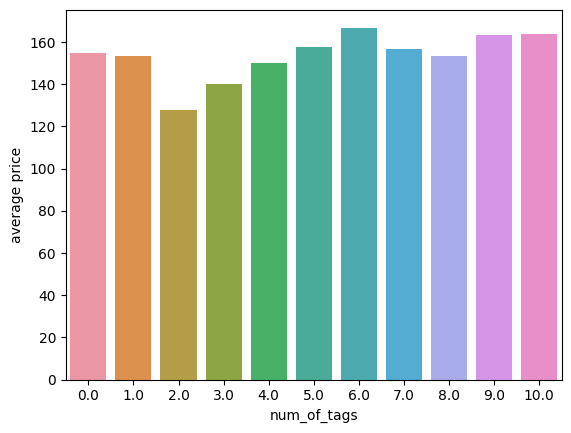

In [531]:
sns.barplot(data=num_of_tags_df, x = num_of_tags_df.index, y = "average price")

In [533]:
num_of_tags_sold_df = pd.DataFrame(df.groupby(by="num_of_tags").sold_price.mean()).rename(columns = {"sold_price": "average sold price"})
num_of_tags_sold_df

,average sold price
num_of_tags,
0.0,111.485641
1.0,109.305556
2.0,107.022727
3.0,111.094017
4.0,109.181319
5.0,123.964286
6.0,135.858065
7.0,130.910959
8.0,135.923304


<Axes: xlabel='num_of_tags', ylabel='average sold price'>

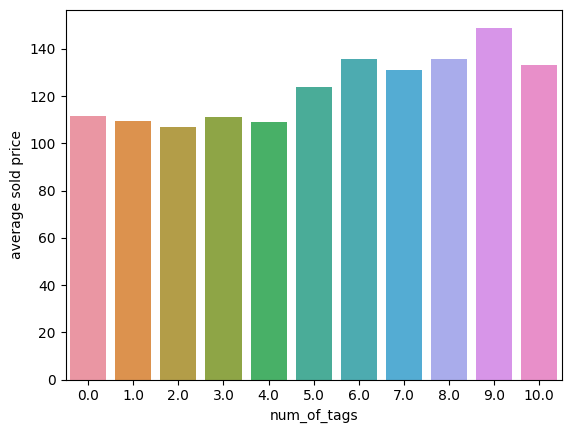

In [534]:
sns.barplot(data=num_of_tags_sold_df, x = num_of_tags_sold_df.index, y = "average sold price")

num_of_photo issue

In [544]:
df.num_of_photos.value_counts()
#TODO have to delete rows with zero photo

8.0     1441
4.0     1424
9.0     1376
7.0     1366
6.0     1283
5.0     1264
10.0    1191
11.0     940
12.0     863
3.0      689
13.0     641
14.0     527
15.0     418
16.0     337
17.0     293
18.0     211
2.0      209
25.0     192
19.0     192
20.0     167
21.0     131
22.0     124
23.0     103
24.0      99
0.0       28
Name: num_of_photos, dtype: int64

In [536]:
num_of_photos_df = pd.DataFrame(df.groupby(by="num_of_photos").price.mean()).rename(columns = {"price": "average price"})
num_of_photos_df

,average price
num_of_photos,
0.0,108.250000
2.0,117.386792
3.0,101.031915
4.0,122.574961
5.0,136.625990
6.0,146.246246
7.0,149.763984
8.0,153.195545
9.0,159.726933


<Axes: xlabel='num_of_photos', ylabel='average price'>

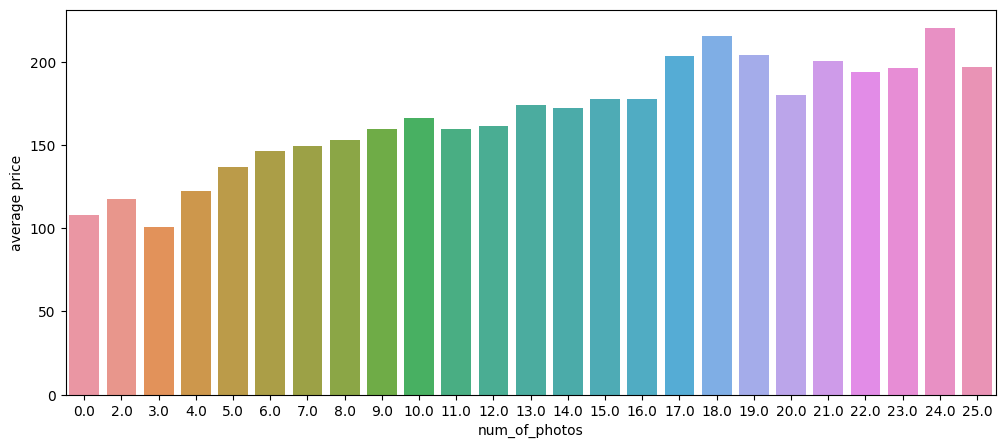

In [540]:
plt.figure(figsize = [12,5])
sns.barplot(data=num_of_photos_df, x = num_of_photos_df.index, y = "average price")

In [541]:
num_of_photos_df = pd.DataFrame(df.groupby(by="num_of_photos").sold_price.mean()).rename(columns = {"sold_price": "average sold price"})
num_of_photos_df

,average sold price
num_of_photos,
0.0,82.500000
2.0,92.310680
3.0,85.987715
4.0,97.631918
5.0,101.857820
6.0,109.058347
7.0,123.684044
8.0,128.018957
9.0,133.491289


<Axes: xlabel='num_of_photos', ylabel='average sold price'>

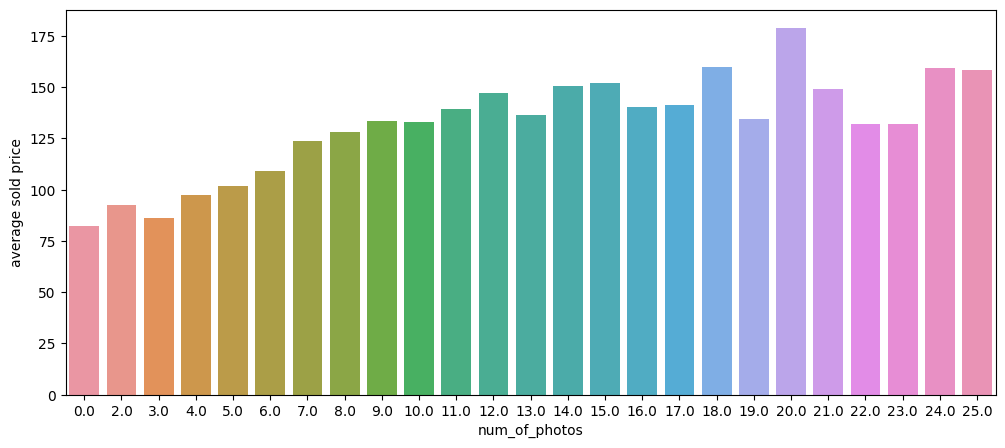

In [542]:
plt.figure(figsize = [12,5])
sns.barplot(data=num_of_photos_df, x = num_of_photos_df.index, y = "average sold price")

location issue

In [514]:
pd.DataFrame(df.groupby(by="location").shipping_price.mean()).rename(columns = {"shipping_price" : "average price of shipping"})

,average price of shipping
location,
AU,23.272967
Asia,26.290985
Canada,26.304262
Europe,20.661354
Other,22.131473
UK,25.269588
US,25.487258


In [512]:
pd.DataFrame(df.groupby(by="location").price.mean()).rename(columns = {"price" : "average price of current item"})

,average price of current item
location,
AU,162.333333
Asia,197.582003
Canada,125.943262
Europe,146.663504
Other,201.402367
UK,149.375000
US,113.727965


Text(0.5, 1.0, 'Number of current listings per region')

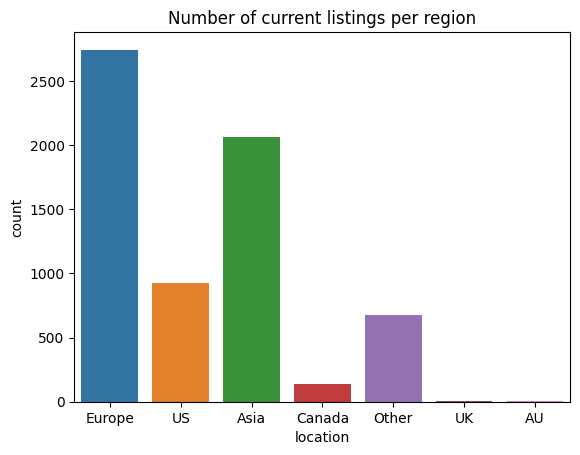

In [509]:
sns.countplot(data=df,x="location")
plt.title("Number of current listings per region")

shipping price issue


In [471]:
mean_shipping_price = df.shipping_price.mean()
df.shipping_price = df.loc[df.sold_price.isna()].shipping_price.fillna(mean_shipping_price)

<Axes: xlabel='shipping_price', ylabel='Count'>

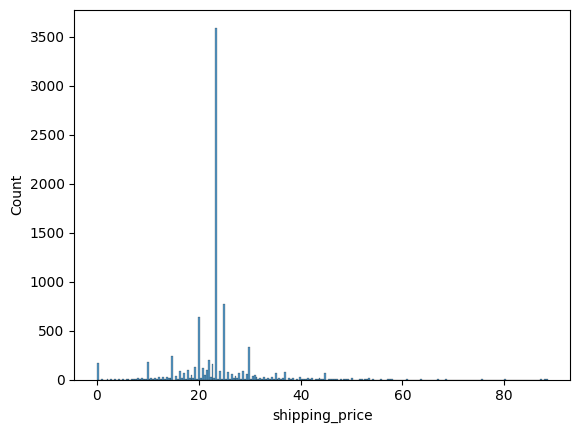

In [545]:
sns.histplot(data = df.loc[df.shipping_price < 100], x="shipping_price")
#TODO have to delete outliers

price issue

In [546]:
#TODO have to delete outliers

<Axes: xlabel='price', ylabel='Count'>

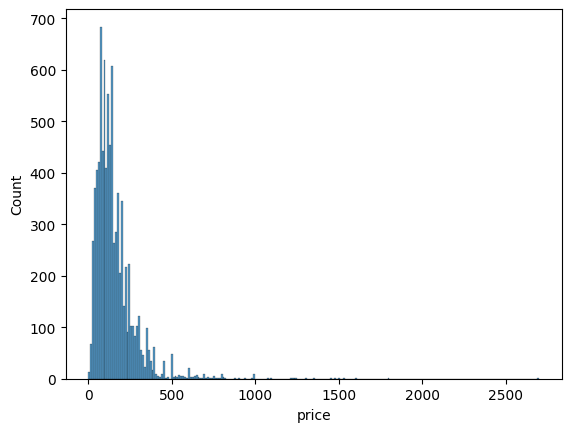

In [489]:
sns.histplot(df.price)

<Axes: xlabel='price', ylabel='Count'>

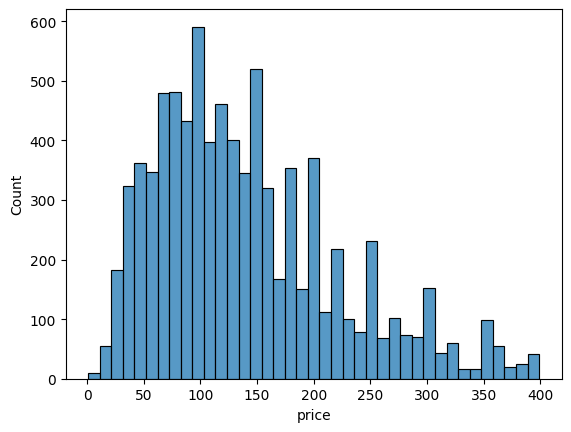

In [493]:
sns.histplot(df.loc[df.price < 400].price)

<Axes: xlabel='sold_price', ylabel='Count'>

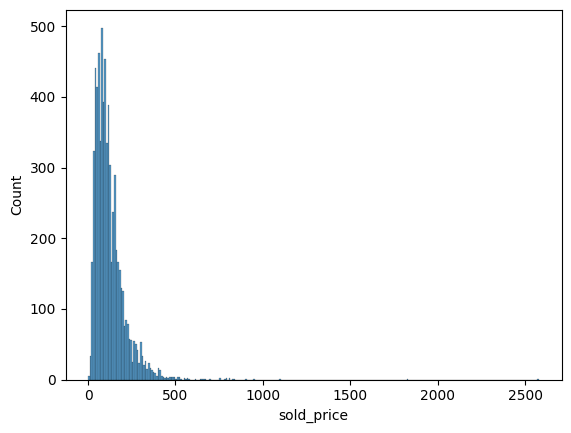

In [494]:
sns.histplot(df.sold_price)

<Axes: xlabel='sold_price', ylabel='Count'>

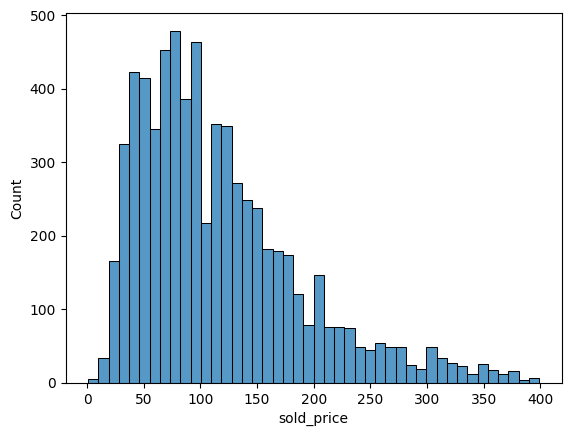

In [499]:
sns.histplot(df.loc[df.sold_price < 400].sold_price)

In [472]:
df.head()

,title,link,size,condition,color,seller_name,designers,description,num_of_photos,num_of_tags,measurements,location,shipping_price,price,sold_price
0,BMW racing rare archive bomber 90s,https://www.grailed.com/listings/33705557-bmw-...,XS,Used,[black],Humanraceeei,Bmw × Formula Uno × Racing,bargaining is appropriate,2.0,0.0,0.0,Europe,10.000000,28.0,NaN
1,Mens Bomber Jacket Racing BMW F1 Size XL,https://www.grailed.com/listings/32948063-bmw-...,XL,Used,[blue],Casual_VntShop,Bmw × Racing × Vintage,Please see all photos\nBMW\nSize XL\nGood Vint...,9.0,0.0,1.0,Europe,21.430000,45.0,NaN
2,BMW E36 Jacket,https://www.grailed.com/listings/42982572-bmw-...,M,Gently Used,[blue],beaubier32,Bmw,BMW E36 Jacket\nFits like mens size medium\nVe...,5.0,0.0,0.0,US,23.388901,35.0,NaN
3,Vintage BMW Racing Jacket Williams F1 Team Hoo...,https://www.grailed.com/listings/42929894-bmw-...,XL,Gently Used,[blue],DealHand,Bmw × Formula Uno × Vintage,BMW Racing Jacket F1 Team\n2003 s Vintage Mode...,16.0,10.0,1.0,Europe,23.388901,50.0,NaN
4,y2k BMW Zip up Jacket,https://www.grailed.com/listings/42583439-bmw-...,XL,Gently Used,[black],hightailvinta5695,Bmw × Streetwear × Vintage,*Measurements in Images*\nPlease Review all ph...,7.0,0.0,1.0,US,21.430000,45.0,NaN
